In [1]:
from sklearn import datasets
import numpy as np
# Cargamos los datos de iris

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print(X[:5])

print('\nClass labels:', np.unique(y))

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]

Class labels: [0 1 2]


In [2]:
# Abre archivo
import pandas as pd
df= pd.read_csv("Iris.csv", header=0)

# Mostrar ptimeros 5 registros
df[:5]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
#CLASIFICAR CON LOS VALORES 
X1 = df.iloc[: , [3,4]].values
#X = df.iloc[: , 2:12].values
y1 = df.iloc[: ,5].values

#imprime las clases
print('Etiquetas de clase:', np.unique(y1))

Etiquetas de clase: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
from sklearn.model_selection import train_test_split

# 70 % del conjunto de datos para entrenamiento y 30 % para validacion
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1,
                                                    stratify = y)

In [6]:
print('Numero de muestras en y:', np.bincount(y))

print('Numero de muestras en y_train:', np.bincount(y_train))

print('Numero de muestras en y_test:', np.bincount(y_test))


Numero de muestras en y: [50 50 50]
Numero de muestras en y_train: [40 40 40]
Numero de muestras en y_test: [10 10 10]


In [7]:
from sklearn.preprocessing import StandardScaler
# Estandarizar los datos
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
#Creando Bosque
from sklearn.ensemble import RandomForestClassifier
bosque = RandomForestClassifier(n_estimators=25,
                                criterion= 'gini',
                                max_features='sqrt',
                                max_depth=10)

bosque.fit(X_train_std,y_train)

# Precision global de clasificación corecta
print('Train Accuracy : %.5f' % bosque.score(X_train_std, y_train))
print('Test Accuracy : %.5f' % bosque.score(X_test_std, y_test))


Train Accuracy : 0.99167
Test Accuracy : 0.96667


In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # configurar el generador de marcadores y el mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # resaltar ejemplos de prueba
    if test_idx:
        # graficar todos los ejemplos
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')

C:\Users\zz\AppData\Local\Temp\ipykernel_15892\2516210683.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


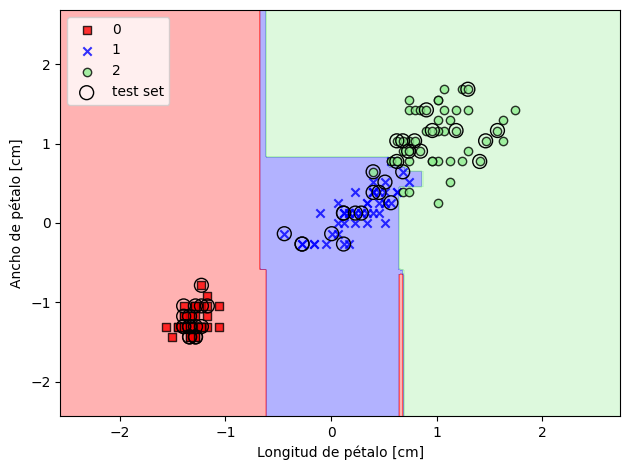

In [10]:
# Graficar Region de desición
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, 
                      classifier = bosque,
                      test_idx = range(105, 150))

plt.xlabel('Longitud de pétalo [cm]')
plt.ylabel('Ancho de pétalo [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

[Text(0.5, 1.0, 'RF2022'),
 Text(0.5, 0, 'Clases predichas'),
 Text(0, 0.5, 'Clases verdaderas')]

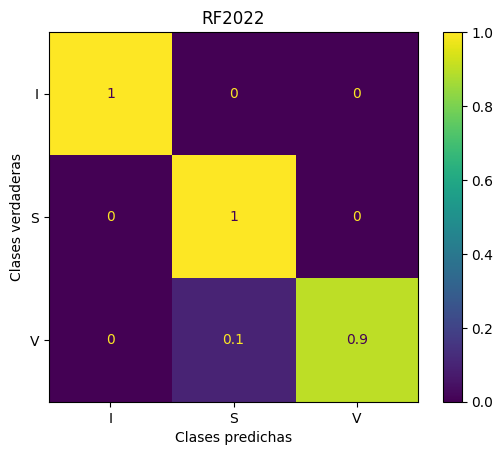

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = bosque.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred, normalize= 'true')

cm_display = ConfusionMatrixDisplay(cm, display_labels= ['I','S','V'])
cm_display.plot()
cm_display.ax_.set(title = 'RF2022', xlabel = 'Clases predichas' , ylabel = 'Clases verdaderas')

  

In [12]:
from sklearn.metrics import precision_recall_fscore_support as score 

precision , recall, fscore, support = score(y_test, y_pred)

print('Presicion: {}', format(precision))
print('Recall: {}', format(recall))
print('F1score: {}', format(fscore))
print('Support: {}', format(support))


Presicion: {} [1.         0.90909091 1.        ]
Recall: {} [1.  1.  0.9]
F1score: {} [1.         0.95238095 0.94736842]
Support: {} [10 10 10]


In [13]:
pred = sc.transform([[1.4,0.2]])
res = bosque.predict(pred)
print(res)


[0]
